In [1]:
import tensorflow as tf
import tensorflow

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.14.0


In [4]:
fashion_mnist=keras.datasets.fashion_mnist

In [5]:
import os
print(os.getcwd())

C:\Users\krishnakakade\image classification in python


In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Ankle boot','Bag']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

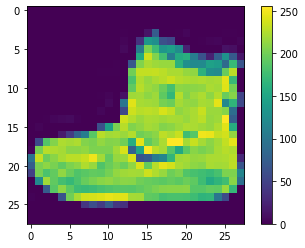

In [13]:
#### now we have to preprocess this data so now we are try to load an image krishna's writes
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images=train_images/255.0
test_images=test_images/255.0

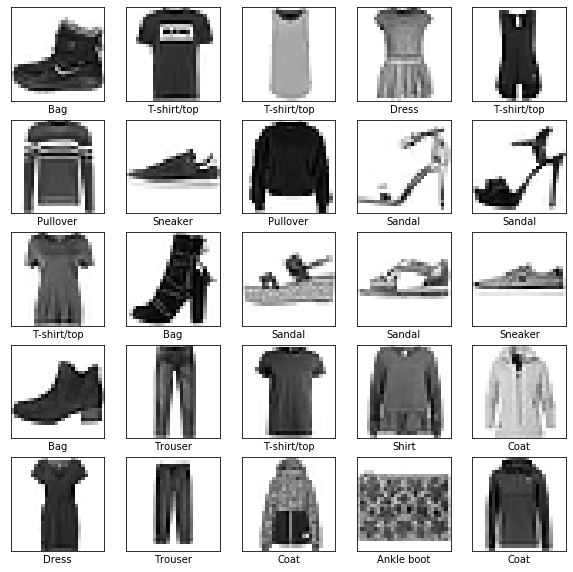

In [15]:
#    Let’s display some images.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)#for unshowing the grid lines in the images 
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
# where are displaying classes name below

In [17]:
#    Setup the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0909 20:58:43.210985  8032 deprecation.py:506] From C:\Users\krishnakakade\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
#    Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

 

In [19]:
#    Model Training
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 11s 175us/sample - loss: 0.4969 - acc: 0.8244
Epoch 2/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3742 - acc: 0.8648
Epoch 3/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.3352 - acc: 0.8781
Epoch 4/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3140 - acc: 0.8848
Epoch 5/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.2950 - acc: 0.8916
Epoch 6/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.2807 - acc: 0.8962
Epoch 7/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.2676 - acc: 0.8999
Epoch 8/10
60000/60000 [==============================] - 14s 233us/sample - loss: 0.2580 - acc: 0.9034
Epoch 9/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.2484 - acc: 0.9076
Epoch 10/10
60000/60000 [==============================] - 13s 22

In [20]:
#    Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.3443 - acc: 0.8780


In [21]:
print('Test accuracy:', test_acc)

Test accuracy: 0.878


In [22]:
#    Making Predictions
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([2.4391081e-08, 6.5752843e-09, 1.1430584e-08, 9.4629025e-09,
       2.0107700e-07, 8.8929839e-04, 7.8447071e-09, 4.0898874e-02,
       1.7107821e-04, 9.5804060e-01], dtype=float32)

In [24]:
#A prediction is an array of 10 numbers. 
#These describe the “confidence” of the model that the image corresponds to each of the 10 different articles of clothing. 
#We can see which label has the highest confidence value.
np.argmax(predictions[0])
#Model is most confident that it's an ankle boot. Let's see if it's correct

9

In [25]:
test_labels[0]

9

In [29]:
#    Now, it’s time to look at the full set of 10 channels
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [30]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

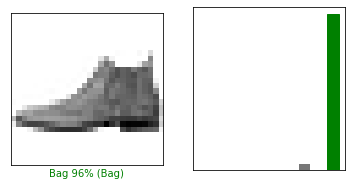

In [31]:
#    Let’s look at the 0th and 10th image first
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

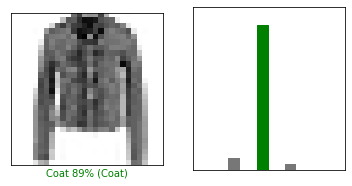

In [33]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()



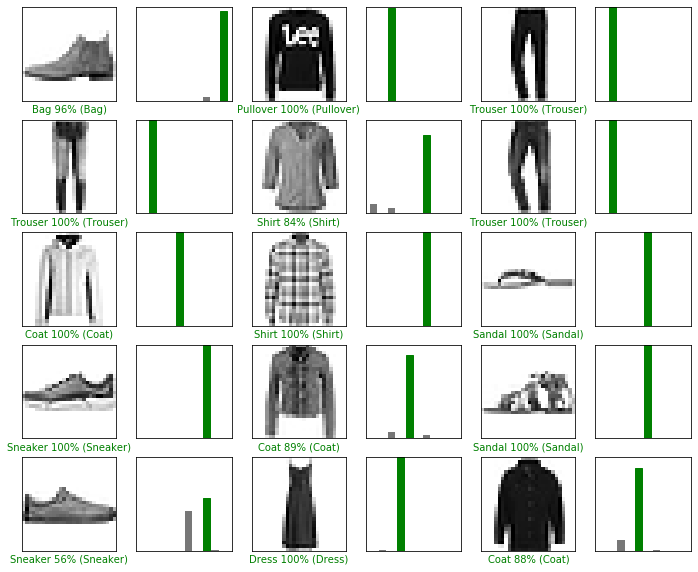

In [35]:
#Now, let’s plot several images and their predictions. Correct ones are green, while the incorrect ones are red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [36]:
#    Finally, we will use the trained model to make a prediction about a single image.
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img) 
print(predictions_single)

(28, 28)
(1, 28, 28)
[[2.4391081e-08 6.5752843e-09 1.1430584e-08 9.4628847e-09 2.0107682e-07
  8.8929804e-04 7.8447071e-09 4.0898882e-02 1.7107837e-04 9.5804060e-01]]


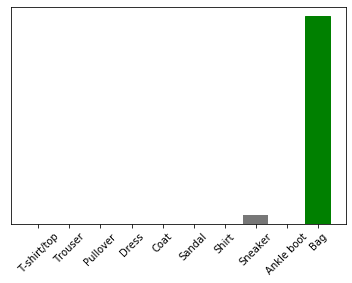

In [37]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [38]:
prediction_result = np.argmax(predictions_single[0])

In [39]:
prediction_result


9